In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pymysql
import numpy as np

%matplotlib inline

In [2]:
main = pd.read_csv("../data/main-merged.csv")

In [3]:
main.head()

,Country,Code,Year,Sex ratio at birth,Female pop rate,5 years old,100 years old,15 years old,20 years old,30 years old,...,Excess female deaths,Missing female births,Child mortality rate (%),Fertility Rate,Life expectancy men,Life expectancy women,GDP per capita (USD),"Inflation, avg cons. prices (% change)",Unemployment rate,Missing women ratio
0,Afghanistan,AFG,1950-01-01,105.19,NaN,103.09,NaN,110.73,115.68,118.57,...,NaN,NaN,41.99,7.45,26.87,28.36,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1951-01-01,105.19,NaN,100.61,NaN,110.24,114.39,118.29,...,NaN,NaN,41.63,7.45,27.14,28.63,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1952-01-01,105.18,NaN,97.61,NaN,109.22,112.67,117.52,...,NaN,NaN,40.93,7.45,27.68,29.17,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1953-01-01,105.18,NaN,95.08,NaN,108.65,111.34,117.06,...,NaN,NaN,40.24,7.45,28.20,29.70,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1954-01-01,105.19,NaN,93.73,NaN,108.70,110.69,117.10,...,NaN,NaN,39.58,7.45,28.72,30.22,NaN,NaN,NaN,NaN


In [4]:
new_df = main.loc[(main["Country"] == "China") | (main["Country"] == "India") | (main["Country"] == "Rest of World")]

In [5]:
df_2015 = new_df.loc[new_df["Year"] == "2015-01-01"]

In [6]:
df_2015

,Country,Code,Year,Sex ratio at birth,Female pop rate,5 years old,100 years old,15 years old,20 years old,30 years old,...,Excess female deaths,Missing female births,Child mortality rate (%),Fertility Rate,Life expectancy men,Life expectancy women,GDP per capita (USD),"Inflation, avg cons. prices (% change)",Unemployment rate,Missing women ratio
2513,China,CHN,2015-01-01,115.47,48.48,116.74,34.42,114.38,112.55,106.02,...,590000.0,870000.0,1.22,1.62,74.64,77.67,8166.76,1.44,4.05,50.220264
5505,India,IND,2015-01-01,110.12,48.16,111.37,46.90,111.47,110.96,108.05,...,380000.0,630000.0,4.80,2.35,66.86,69.88,1639.69,4.90,NaN,32.966226
13983,Rest of World,NaN,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,670000.0,190000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.740088


In [7]:
df_2015["Missing women ratio"] = (df_2015["Missing women"] / 136200000) * 100

<ipython-input-7-8059c9fbdd05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015["Missing women ratio"] = (df_2015["Missing women"] / 136200000) * 100


In [8]:
df_2015

,Country,Code,Year,Sex ratio at birth,Female pop rate,5 years old,100 years old,15 years old,20 years old,30 years old,...,Excess female deaths,Missing female births,Child mortality rate (%),Fertility Rate,Life expectancy men,Life expectancy women,GDP per capita (USD),"Inflation, avg cons. prices (% change)",Unemployment rate,Missing women ratio
2513,China,CHN,2015-01-01,115.47,48.48,116.74,34.42,114.38,112.55,106.02,...,590000.0,870000.0,1.22,1.62,74.64,77.67,8166.76,1.44,4.05,50.220264
5505,India,IND,2015-01-01,110.12,48.16,111.37,46.90,111.47,110.96,108.05,...,380000.0,630000.0,4.80,2.35,66.86,69.88,1639.69,4.90,NaN,32.966226
13983,Rest of World,NaN,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,670000.0,190000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.740088


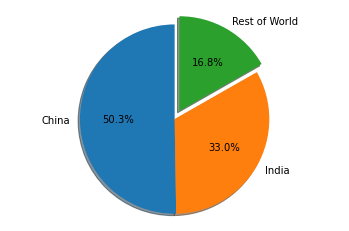

In [9]:
labels = df_2015["Country"]
sizes = df_2015["Missing women ratio"]
explode = (0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90);

ax1.axis('equal'); # Equal aspect ratio ensures that pie is drawn as a circle.

Create the ratio column for the main dataframe 

In [10]:
main["Missing women ratio"] = (main["Missing women"] / 136200000) * 100

In [11]:
main.head()

,Country,Code,Year,Sex ratio at birth,Female pop rate,5 years old,100 years old,15 years old,20 years old,30 years old,...,Excess female deaths,Missing female births,Child mortality rate (%),Fertility Rate,Life expectancy men,Life expectancy women,GDP per capita (USD),"Inflation, avg cons. prices (% change)",Unemployment rate,Missing women ratio
0,Afghanistan,AFG,1950-01-01,105.19,NaN,103.09,NaN,110.73,115.68,118.57,...,NaN,NaN,41.99,7.45,26.87,28.36,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1951-01-01,105.19,NaN,100.61,NaN,110.24,114.39,118.29,...,NaN,NaN,41.63,7.45,27.14,28.63,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1952-01-01,105.18,NaN,97.61,NaN,109.22,112.67,117.52,...,NaN,NaN,40.93,7.45,27.68,29.17,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1953-01-01,105.18,NaN,95.08,NaN,108.65,111.34,117.06,...,NaN,NaN,40.24,7.45,28.20,29.70,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1954-01-01,105.19,NaN,93.73,NaN,108.70,110.69,117.10,...,NaN,NaN,39.58,7.45,28.72,30.22,NaN,NaN,NaN,NaN


In [12]:
main.dtypes

Country                                    object
Code                                       object
Year                                       object
Sex ratio at birth                        float64
Female pop rate                           float64
5 years old                               float64
100 years old                             float64
15 years old                              float64
20 years old                              float64
30 years old                              float64
40 years old                              float64
50 years old                              float64
60 years old                              float64
70 years old                              float64
80 years old                              float64
90 years old                              float64
Missing women                             float64
Excess female deaths                      float64
Missing female births                     float64
Child mortality rate (%)                  float64


In [13]:
main.to_csv("../data/main-merged.csv", index = False)